# to do change decimals ticks

# change error bars

In [1]:
import pandas as pd

import numpy as np

import math

import copy

import matplotlib.pyplot as plt

import statistics

In [2]:
def get_average_and_std(lst): 
    return(sum(lst)/len(lst), statistics.stdev(lst))

def remove_nan_and_float(lists):
    newlists = []
    for tr in lists:
        newlists.append([int(x) for x in tr if str(x) != 'nan'])
    return(newlists)

def import_log(filepath):
    df = pd.read_csv(filepath)
    return(remove_nan_and_float(df.values.tolist()))

def count_variant(log, variant): #count how many times a variant comes up in list
    c = 0
    for trace in log:
        if trace == variant:
            c += 1
    return(c)

def get_counts(log, variants):
    counts = []
    for var in variants:
        counts.append(count_variant(log, var))
    return counts

def get_variants_list(lst): #get all of the variants in a list, return as list
    st = set(tuple(i) for i in lst) #convert list into set of tuples
    lst2 = list(st) #convert set of tuples into lsit of tuples
    return [list(e) for e in lst2]


def get_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    arr = [min(occ_each_trvar_sim[i], occ_each_trvar_tr[i])/sum(occ_each_trvar_tr) for i in range(0, len(occ_each_trvar_sim))]
    return sum(arr)

def get_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    arr = [min(occ_each_simvar_sim[i], occ_each_simvar_trte[i])/sum(occ_each_simvar_sim) for i in range(0, len(occ_each_simvar_sim))]
    return sum(arr)

def get_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    arr = [min(occ_each_tevar_sim[i], occ_each_tevar_te[i])/sum(occ_each_tevar_te) for i in range(0, len(occ_each_tevar_sim))]
    return sum(arr)


def get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    fit = 0
    for i in range(0, len(occ_each_trvar_sim)):
        if occ_each_trvar_sim[i] > 0:
            fit = fit + 1
    fit = fit/len(occ_each_trvar_sim)
    return fit

def get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    prec = 0
    for i in range(0, len(occ_each_simvar_trte)):
        if occ_each_simvar_trte[i] > 0:
            prec = prec + 1
    prec = prec/len(occ_each_simvar_trte)
    return prec

def get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    gen = 0.0
    for i in range(0, len(occ_each_tevar_sim)):
        if occ_each_tevar_sim[i] > 0:
            gen = gen + 1.0
    gen = gen/len(occ_each_tevar_sim)
    return gen

def get_relaxed_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    fit = 0
    for i in range(0, len(occ_each_trvar_sim)):
        if occ_each_trvar_sim[i] > 0:
            fit = fit + occ_each_trvar_tr[i]
    fit = fit/sum(occ_each_trvar_tr)
    return fit

def get_relaxed_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    prec = 0
    for i in range(0, len(occ_each_simvar_trte)):
        if occ_each_simvar_trte[i] > 0:
            prec = prec + occ_each_simvar_sim[i]
    prec = prec/sum(occ_each_simvar_sim)
    return prec

def get_relaxed_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    gen = 0.0
    for i in range(0, len(occ_each_tevar_sim)):
        if occ_each_tevar_sim[i] > 0:
            gen = gen + occ_each_tevar_te[i]
    gen = gen/sum(occ_each_tevar_te)
    return gen

def LOVOCV(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    overall_counts = get_counts(traintestlog, variants) #list for the count of each variant in original log
    
    fitness_arr = []
    precision_arr = []
    generalization_arr = []
    
    for i_var in range(0, len(variants)):
        train_log = import_log('LOVOCV/'+modelname+'/Training_Logs/Train'+str(i_var)+".csv")
        test_log = import_log('LOVOCV/'+modelname+'/Test_Logs/Test'+str(i_var)+".csv")
        sim_log = import_log('LOVOCV/'+modelname+'/Simulated_Logs/Sim'+str(i_var)+".csv")
        
        #needed to calculate metrics
        trvar = get_variants_list(train_log)
        simvar = get_variants_list(sim_log)
        tevar = get_variants_list(test_log) 
        
        occ_each_trvar_sim = get_counts(sim_log, trvar)
        occ_each_tevar_sim = get_counts(sim_log, tevar)
        occ_each_simvar_sim = get_counts(sim_log, simvar)
        
        #get counts for the train log
        occ_each_trvar_tr = get_counts(train_log, trvar)

        #get counts for the test log
        occ_each_tevar_te = get_counts(test_log, tevar)

        #get counts for the train test log
        occ_each_simvar_trte = get_counts(traintestlog, simvar)

        fitness_arr.append(get_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
        precision_arr.append(get_precision(occ_each_simvar_sim, occ_each_simvar_trte))
        generalization_arr.append(get_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
    generalization_ave, generalization_std = get_average_and_std(generalization_arr)
    precision_ave, precision_std = get_average_and_std(precision_arr)
    fitness_ave, fitness_std = get_average_and_std(fitness_arr)
    
    return fitness_ave, fitness_std, precision_ave, precision_std, generalization_ave, generalization_std

def Abs_LOVOCV(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    overall_counts = get_counts(traintestlog, variants) #list for the count of each variant in original log
    
    fitness_arr = []
    precision_arr = []
    generalization_arr = []
    
    for i_var in range(0, len(variants)):
        train_log = import_log('LOVOCV/'+modelname+'/Training_Logs/Train'+str(i_var)+".csv")
        test_log = import_log('LOVOCV/'+modelname+'/Test_Logs/Test'+str(i_var)+".csv")
        sim_log = import_log('LOVOCV/'+modelname+'/Simulated_Logs/Sim'+str(i_var)+".csv")
        
        #needed to calculate metrics
        trvar = get_variants_list(train_log)
        simvar = get_variants_list(sim_log)
        tevar = get_variants_list(test_log) 
        
        occ_each_trvar_sim = get_counts(sim_log, trvar)
        occ_each_tevar_sim = get_counts(sim_log, tevar)
        occ_each_simvar_sim = get_counts(sim_log, simvar)
        
        #get counts for the train log
        occ_each_trvar_tr = get_counts(train_log, trvar)

        #get counts for the test log
        occ_each_tevar_te = get_counts(test_log, tevar)

        #get counts for the train test log
        occ_each_simvar_trte = get_counts(traintestlog, simvar)

        fitness_arr.append(get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
        precision_arr.append(get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte))
        generalization_arr.append(get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
    generalization_ave, generalization_std = get_average_and_std(generalization_arr)
    precision_ave, precision_std = get_average_and_std(precision_arr)
    fitness_ave, fitness_std = get_average_and_std(fitness_arr)
    
    return fitness_ave, fitness_std, precision_ave, precision_std, generalization_ave, generalization_std

def Relaxed_LOVOCV(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    overall_counts = get_counts(traintestlog, variants) #list for the count of each variant in original log
    
    fitness_arr = []
    precision_arr = []
    generalization_arr = []
    
    for i_var in range(0, len(variants)):
        train_log = import_log('LOVOCV/'+modelname+'/Training_Logs/Train'+str(i_var)+".csv")
        test_log = import_log('LOVOCV/'+modelname+'/Test_Logs/Test'+str(i_var)+".csv")
        sim_log = import_log('LOVOCV/'+modelname+'/Simulated_Logs/Sim'+str(i_var)+".csv")
        
        #needed to calculate metrics
        trvar = get_variants_list(train_log)
        simvar = get_variants_list(sim_log)
        tevar = get_variants_list(test_log) 
        
        occ_each_trvar_sim = get_counts(sim_log, trvar)
        occ_each_tevar_sim = get_counts(sim_log, tevar)
        occ_each_simvar_sim = get_counts(sim_log, simvar)
        
        #get counts for the train log
        occ_each_trvar_tr = get_counts(train_log, trvar)

        #get counts for the test log
        occ_each_tevar_te = get_counts(test_log, tevar)

        #get counts for the train test log
        occ_each_simvar_trte = get_counts(traintestlog, simvar)

        fitness_arr.append(get_relaxed_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
        precision_arr.append(get_relaxed_precision(occ_each_simvar_sim, occ_each_simvar_trte))
        generalization_arr.append(get_relaxed_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
    generalization_ave, generalization_std = get_average_and_std(generalization_arr)
    precision_ave, precision_std = get_average_and_std(precision_arr)
    fitness_ave, fitness_std = get_average_and_std(fitness_arr)
    
    return fitness_ave, fitness_std, precision_ave, precision_std, generalization_ave, generalization_std

In [3]:
def get_folds(modelname):
    folds = [20, 15, 10, 8, 6, 5, 4, 3, 2]
    
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    num_variants = len(variants)

    percentages = []
    
    fit = []
    fit_err = []
    
    prec = []
    prec_err = []
    
    gen = []
    gen_err = []
    
    percentages.append(1.0)
    
    fit_LOVOCV, fit_LOVOCV_std, prec_LOVOCV, prec_LOVOCV_std, gen_LOVOCV, gen_LOVOCV_std = LOVOCV(modelname)
    
    fit.append(fit_LOVOCV)
    fit_err.append(fit_LOVOCV_std)
    prec.append(prec_LOVOCV)
    prec_err.append(prec_LOVOCV_std)
    gen.append(gen_LOVOCV)
    gen_err.append(gen_LOVOCV_std)
    
    
    for fold in folds:
        percentages.append(num_variants/fold)
        
        fitness_arr = []
        precision_arr = []
        generalization_arr = []
        
        for i in range(0, fold):
            train_log = import_log("LEAVEFOLDOUT/"+modelname+"/Training_Logs/Fold"+str(fold)+"/Train"+str(i)+".csv")
            test_log = import_log("LEAVEFOLDOUT/"+modelname+"/Test_Logs/Fold"+str(fold)+"/Test"+str(i)+".csv")
            sim_log = import_log("LEAVEFOLDOUT/"+modelname+"/Simulated_Logs/Fold"+str(fold)+"/Sim"+str(i)+".csv")
        
            #needed to calculate metrics
            trvar = get_variants_list(train_log)
            simvar = get_variants_list(sim_log)
            tevar = get_variants_list(test_log) 

            occ_each_trvar_sim = get_counts(sim_log, trvar)
            occ_each_tevar_sim = get_counts(sim_log, tevar)
            occ_each_simvar_sim = get_counts(sim_log, simvar)

            #get counts for the train log
            occ_each_trvar_tr = get_counts(train_log, trvar)

            #get counts for the test log
            occ_each_tevar_te = get_counts(test_log, tevar)

            #get counts for the train test log
            occ_each_simvar_trte = get_counts(traintestlog, simvar)

            fitness_arr.append(get_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
            precision_arr.append(get_precision(occ_each_simvar_sim, occ_each_simvar_trte))
            generalization_arr.append(get_generalization(occ_each_tevar_sim, occ_each_tevar_te))

        generalization_ave, generalization_std = get_average_and_std(generalization_arr)
        precision_ave, precision_std = get_average_and_std(precision_arr)
        fitness_ave, fitness_std = get_average_and_std(fitness_arr)
        
        fit.append(fitness_ave)
        fit_err.append(fitness_std)
        
        prec.append(precision_ave)
        prec_err.append(precision_std)
        
        gen.append(generalization_ave)
        gen_err.append(generalization_std)
    
    percentages = [ round(elem, 1) for elem in percentages ]
    print(percentages)
    print(fit)
    print(prec)
    print(gen)

    fig = plt.figure(figsize=(10,5))
    plt.title(modelname)
    plt.xticks(percentages)
    plt.xlabel("Number of variants per fold (left out)")
    plt.errorbar(percentages, fit, yerr=fit_err, label=r'$F_{PMSL}$')
    plt.errorbar(percentages, prec, yerr=prec_err, label=r'$P_{PMSL}$')
    plt.errorbar(percentages, gen, yerr=gen_err, label=r'$G_{PMSL}$')
    plt.legend()
    plt.savefig("Plots/"+modelname+".pdf", format="pdf", bbox_inches='tight')
    
def get_folds_abs(modelname):
    folds = [20, 15, 10, 8, 6, 5, 4, 3, 2]
    
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    num_variants = len(variants)

    percentages = []
    
    fit = []
    fit_err = []
    
    prec = []
    prec_err = []
    
    gen = []
    gen_err = []
    
    percentages.append(1.0)
    
    fit_LOVOCV, fit_LOVOCV_std, prec_LOVOCV, prec_LOVOCV_std, gen_LOVOCV, gen_LOVOCV_std = Abs_LOVOCV(modelname)
    
    fit.append(fit_LOVOCV)
    fit_err.append(fit_LOVOCV_std)
    prec.append(prec_LOVOCV)
    prec_err.append(prec_LOVOCV_std)
    gen.append(gen_LOVOCV)
    gen_err.append(gen_LOVOCV_std)
    
    
    for fold in folds:
        percentages.append(num_variants/fold)
        
        fitness_arr = []
        precision_arr = []
        generalization_arr = []
        
        for i in range(0, fold):
            train_log = import_log("LEAVEFOLDOUT/"+modelname+"/Training_Logs/Fold"+str(fold)+"/Train"+str(i)+".csv")
            test_log = import_log("LEAVEFOLDOUT/"+modelname+"/Test_Logs/Fold"+str(fold)+"/Test"+str(i)+".csv")
            sim_log = import_log("LEAVEFOLDOUT/"+modelname+"/Simulated_Logs/Fold"+str(fold)+"/Sim"+str(i)+".csv")
        
            #needed to calculate metrics
            trvar = get_variants_list(train_log)
            simvar = get_variants_list(sim_log)
            tevar = get_variants_list(test_log) 

            occ_each_trvar_sim = get_counts(sim_log, trvar)
            occ_each_tevar_sim = get_counts(sim_log, tevar)
            occ_each_simvar_sim = get_counts(sim_log, simvar)

            #get counts for the train log
            occ_each_trvar_tr = get_counts(train_log, trvar)

            #get counts for the test log
            occ_each_tevar_te = get_counts(test_log, tevar)

            #get counts for the train test log
            occ_each_simvar_trte = get_counts(traintestlog, simvar)

            fitness_arr.append(get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
            precision_arr.append(get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte))
            generalization_arr.append(get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
        generalization_ave, generalization_std = get_average_and_std(generalization_arr)
        precision_ave, precision_std = get_average_and_std(precision_arr)
        fitness_ave, fitness_std = get_average_and_std(fitness_arr)
        
        fit.append(fitness_ave)
        fit_err.append(fitness_std)
        
        prec.append(precision_ave)
        prec_err.append(precision_std)
        
        gen.append(generalization_ave)
        gen_err.append(generalization_std)
    percentages = [ round(elem, 1) for elem in percentages ]   
    print(percentages)
    print(fit)
    print(prec)
    print(gen)

    fig = plt.figure(figsize=(10,5))
    plt.title("Absolute "+ modelname)
    plt.xticks(percentages)
    plt.xlabel("Number of variants per fold (left out)")
    plt.errorbar(percentages, fit, yerr=fit_err, label=r'$F_{A-PMSL}$')
    plt.errorbar(percentages, prec, yerr=prec_err, label=r'$P_{A-PMSL}$')
    plt.errorbar(percentages, gen, yerr=gen_err, label=r'$G_{A-PMSL}$')
    plt.legend()
    plt.savefig("Plots/Absolute_"+modelname+".pdf", format="pdf", bbox_inches='tight')
    
def get_folds_rel(modelname):
    folds = [20, 15, 10, 8, 6, 5, 4, 3, 2]
    
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    num_variants = len(variants)

    percentages = []
    
    fit = []
    fit_err = []
    
    prec = []
    prec_err = []
    
    gen = []
    gen_err = []
    
    percentages.append(1.0)
    
    fit_LOVOCV, fit_LOVOCV_std, prec_LOVOCV, prec_LOVOCV_std, gen_LOVOCV, gen_LOVOCV_std = Relaxed_LOVOCV(modelname)
    
    fit.append(fit_LOVOCV)
    fit_err.append(fit_LOVOCV_std)
    prec.append(prec_LOVOCV)
    prec_err.append(prec_LOVOCV_std)
    gen.append(gen_LOVOCV)
    gen_err.append(gen_LOVOCV_std)
    
    
    for fold in folds:
        percentages.append(num_variants/fold)
        
        fitness_arr = []
        precision_arr = []
        generalization_arr = []
        
        for i in range(0, fold):
            train_log = import_log("LEAVEFOLDOUT/"+modelname+"/Training_Logs/Fold"+str(fold)+"/Train"+str(i)+".csv")
            test_log = import_log("LEAVEFOLDOUT/"+modelname+"/Test_Logs/Fold"+str(fold)+"/Test"+str(i)+".csv")
            sim_log = import_log("LEAVEFOLDOUT/"+modelname+"/Simulated_Logs/Fold"+str(fold)+"/Sim"+str(i)+".csv")
        
            #needed to calculate metrics
            trvar = get_variants_list(train_log)
            simvar = get_variants_list(sim_log)
            tevar = get_variants_list(test_log) 

            occ_each_trvar_sim = get_counts(sim_log, trvar)
            occ_each_tevar_sim = get_counts(sim_log, tevar)
            occ_each_simvar_sim = get_counts(sim_log, simvar)

            #get counts for the train log
            occ_each_trvar_tr = get_counts(train_log, trvar)

            #get counts for the test log
            occ_each_tevar_te = get_counts(test_log, tevar)

            #get counts for the train test log
            occ_each_simvar_trte = get_counts(traintestlog, simvar)

            fitness_arr.append(get_relaxed_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
            precision_arr.append(get_relaxed_precision(occ_each_simvar_sim, occ_each_simvar_trte))
            generalization_arr.append(get_relaxed_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
        generalization_ave, generalization_std = get_average_and_std(generalization_arr)
        precision_ave, precision_std = get_average_and_std(precision_arr)
        fitness_ave, fitness_std = get_average_and_std(fitness_arr)
        
        fit.append(fitness_ave)
        fit_err.append(fitness_std)
        
        prec.append(precision_ave)
        prec_err.append(precision_std)
        
        gen.append(generalization_ave)
        gen_err.append(generalization_std)
    percentages = [ round(elem, 1) for elem in percentages ]  
    print(percentages)
    print(fit)
    print(prec)
    print(gen)

    fig = plt.figure(figsize=(10,5))
    plt.title("Relative_" + modelname)
    plt.xticks(percentages)
    plt.xlabel("Number of variants per fold (left out)")
    plt.errorbar(percentages, fit, yerr=fit_err, label=r'$F_{R-PMSL}$')
    plt.errorbar(percentages, prec, yerr=prec_err, label=r'$P_{R-PMSL}$')
    plt.errorbar(percentages, gen, yerr=gen_err, label=r'$G_{R-PMSL}$')
    plt.legend()
    plt.savefig("Plots/Relative_"+modelname+".pdf", format="pdf", bbox_inches='tight')

In [4]:
#plt.rcParams['text.usetex'] = True

[1.0, 6.0, 8.0, 12.0, 15.0, 20.0, 24.0, 30.0, 40.0, 60.0]
[0.9434824035254169, 0.9374575105230314, 0.9377360870540891, 0.9387827218837502, 0.9361117370859223, 0.9413831235216582, 0.9970233526141188, 0.9664062312479687, 0.980984363035082, 0.9967574633234011]
[0.9425604166666662, 0.9169749999999999, 0.9088611111111111, 0.8842083333333335, 0.8711562499999999, 0.8415416666666666, 0.7986333333333331, 0.7709791666666665, 0.705861111111111, 0.5355416666666664]
[0.838107257173785, 0.5285435137694113, 0.5046803388474382, 0.3929792439568607, 0.41818942088312755, 0.34164746685550007, 0.005089185705943077, 0.18235681045055593, 0.15548258423787029, 0.0743745599874841]


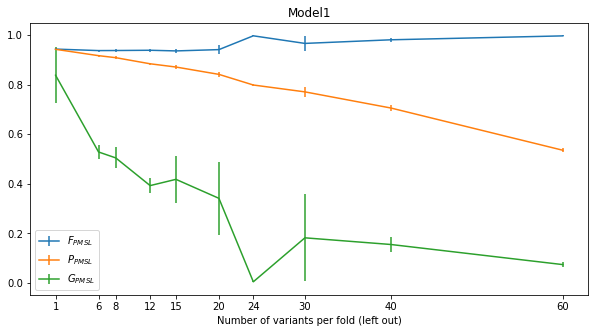

In [5]:
get_folds('Model1')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[0.9419887144057115, 0.9388432717500315, 0.9358384748789492, 0.9334324459527366, 0.9429747774849747, 0.934909075552432, 0.9480559093338506, 0.9995838391119419, 0.9787932577595623, 0.9999999999999998]
[0.9417407226562498, 0.9320585937500002, 0.9180364583333331, 0.8975703125000001, 0.8605957031250001, 0.8492578125000002, 0.826421875, 0.75099609375, 0.6992708333333334, 0.5]
[0.9151766853341539, 0.8053557064686512, 0.6670244062729663, 0.5745948358018537, 0.2838382511325404, 0.42044988623150026, 0.34103415259410386, 0.0052368996794238745, 0.14028817962662454, 0.0]


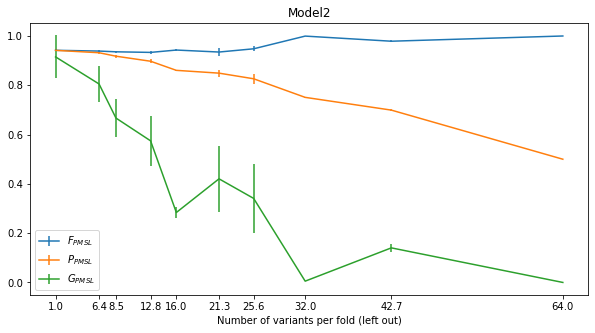

In [6]:
get_folds('Model2')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[0.9438307699742784, 0.9399124845708349, 0.9410571109864903, 0.946518253428924, 0.9708934495127923, 0.9607082290939563, 0.9698604758460199, 0.9988305544648303, 0.9811351327389769, 0.9999999999999998]
[0.9435296630859372, 0.9294140625, 0.9149479166666665, 0.8951484375, 0.8656738281249998, 0.8544401041666666, 0.8192812500000001, 0.75240234375, 0.6944010416666666, 0.5]
[0.9116449939885665, 0.7331530388704375, 0.5466115995712337, 0.4346978697699873, 0.12820805877504515, 0.31981685630242646, 0.2163884318414316, 0.013132139953440708, 0.12090610208472392, 0.0]


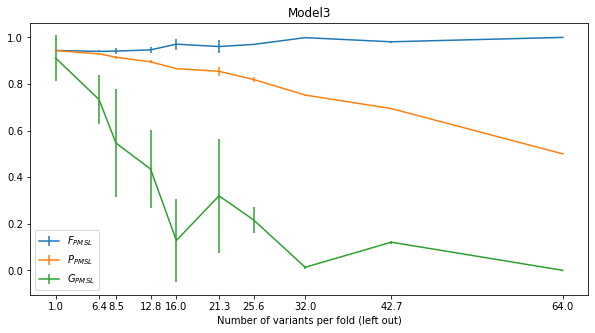

In [7]:
get_folds('Model3')

[1.0, 3.2, 4.3, 6.4, 8.0, 10.7, 12.8, 16.0, 21.3, 32.0]
[0.9239855524734958, 0.9212737568322573, 0.9343032756964775, 0.9350253660061976, 0.9688089142217602, 0.9514272478253766, 0.962393161443423, 0.9879332149982106, 0.9702754809156611, 1.0]
[0.9201074218750003, 0.8984531249999999, 0.88996875, 0.87046875, 0.8508593750000001, 0.8282812499999999, 0.7969687499999999, 0.7404296874999999, 0.6823958333333332, 0.5000781249999999]
[0.7085783137478495, 0.5033509827327582, 0.32561279447031083, 0.2958124907508735, 0.05082398250975103, 0.22674180377571804, 0.140466785671236, 0.001182272620971171, 0.10682934031141644, 0.00015508684863523573]


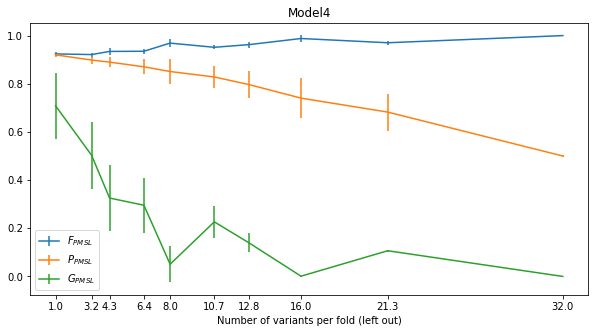

In [8]:
get_folds('Model4')

[1.0, 6.3, 8.4, 12.6, 15.8, 21.0, 25.2, 31.5, 42.0, 63.0]
[0.9007110753456445, 0.9080580875252282, 0.9143332760896576, 0.9286062055608589, 0.9336942737149813, 0.9487797091195778, 0.9526216179601136, 0.9704623345153968, 0.9852731416890993, 0.9994762036398305]
[0.8979138321995467, 0.8798730158730157, 0.8732857142857141, 0.8564841269841269, 0.8378968253968252, 0.8125793650793648, 0.787968253968254, 0.7517658730158729, 0.676084656084656, 0.5126984126984128]
[0.6747360678994965, 0.40521980723719686, 0.33927482267073666, 0.2342475992119784, 0.20515150098993729, 0.14848443850421097, 0.1358036164390177, 0.10490110225418504, 0.06281760706801416, 0.024662177070683813]


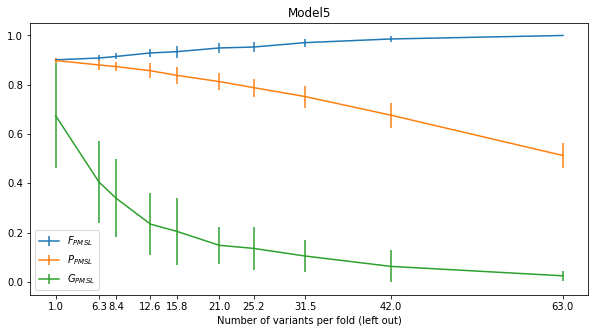

In [9]:
get_folds('Model5')

[1.0, 1.4, 1.8, 2.7, 3.4, 4.5, 5.4, 6.8, 9.0, 13.5]
[0.8561908793042657, 0.8351262573270744, 0.8473607612332553, 0.8515791021202548, 0.8558624363017897, 0.83617805370704, 0.8566596229334099, 0.824916792943319, 0.873131328122648, 0.8879150568389669]
[0.8529492455418376, 0.831444444444444, 0.8461481481481475, 0.8440370370370365, 0.8356018518518513, 0.8082098765432094, 0.815851851851851, 0.7644444444444438, 0.7848148148148143, 0.7220370370370368]
[0.8649942842590461, 0.8409844611521082, 0.8396028851023049, 0.885075363822428, 0.8037425147214835, 0.8264003544089201, 0.7599057304497363, 0.6673728254395136, 0.6903576062034499, 0.5925382951682312]


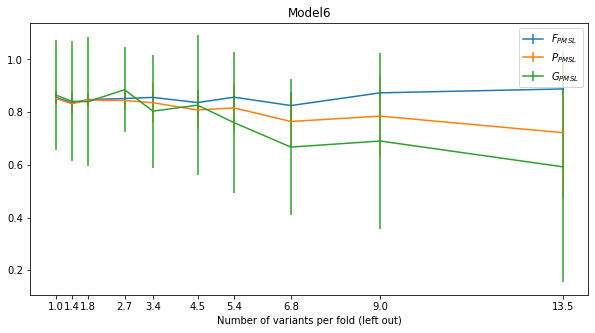

In [10]:
get_folds('Model6')

[1.0, 6.0, 8.0, 12.0, 15.0, 20.0, 24.0, 30.0, 40.0, 60.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.592817309845936, 0.58291314259081, 0.5794015092788756, 0.5742433786142379, 0.5660305228135643, 0.5292877241224877, 0.5826552262749071, 0.5139967561145404, 0.5420696027375481, 0.46877967711301044]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41666666666666663, 0.675, 0.6833333333333335, 0.7583333333333333]


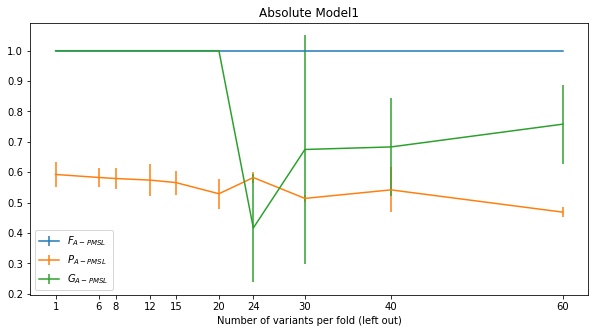

In [11]:
get_folds_abs('Model1')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7022721243451426, 0.7100349736003719, 0.6895976816474219, 0.6813895349752938, 0.7087548305585659, 0.6947126912499203, 0.6740268289498319, 0.5938484124599243, 0.5915100339652769, 0.49480597014925376]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.390625, 0.663344407530454, 0.0]


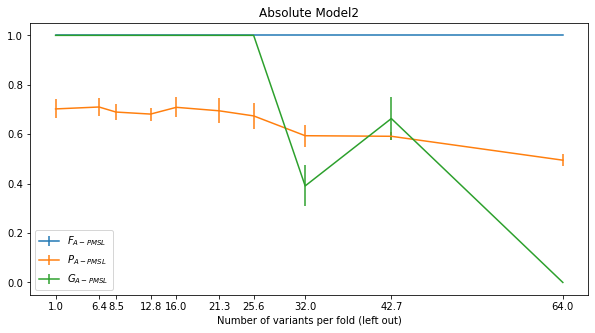

In [12]:
get_folds_abs('Model2')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.828526207636802, 0.800373800969408, 0.8175220019103265, 0.782765529762682, 0.7727527710235184, 0.77636702785566, 0.7574329666614811, 0.8158523041400403, 0.7465440260611288, 0.7491493126446169]
[1.0, 1.0, 1.0, 1.0, 0.9609375, 0.9920634920634921, 0.9843076923076923, 0.6640625, 0.5605389442598745, 0.0]


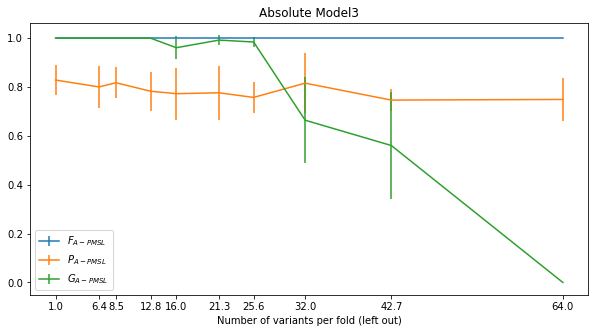

In [13]:
get_folds_abs('Model3')

[1.0, 3.2, 4.3, 6.4, 8.0, 10.7, 12.8, 16.0, 21.3, 32.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.36387977912628505, 0.35731324423653565, 0.3876327687122744, 0.3631625577870389, 0.3638658001763764, 0.38945845576105587, 0.3402269827339207, 0.32982328715591636, 0.3305995926325757, 0.2924255797159593]
[1.0, 1.0, 1.0, 1.0, 0.90625, 0.9848484848484849, 0.8307692307692307, 0.140625, 0.4401154401154401, 0.015625]


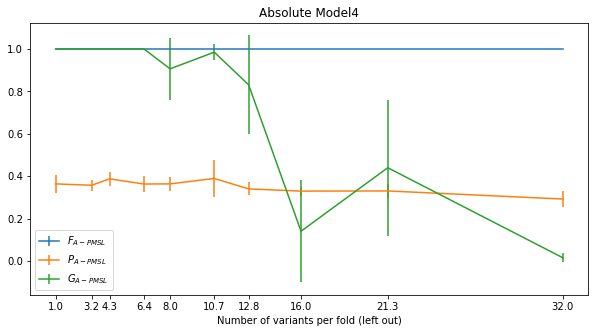

In [14]:
get_folds_abs('Model4')

[1.0, 6.3, 8.4, 12.6, 15.8, 21.0, 25.2, 31.5, 42.0, 63.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.24589466628219733, 0.22649308803978507, 0.2324538775380346, 0.2368730212311217, 0.23001936631289818, 0.22083595859978963, 0.22549947281857938, 0.20950253470479402, 0.1989135267861266, 0.13385087719298247]
[1.0, 0.9857142857142858, 0.9916666666666667, 0.9128205128205128, 0.8416666666666667, 0.7936507936507936, 0.6704615384615384, 0.5655241935483871, 0.5238095238095238, 0.11904761904761904]


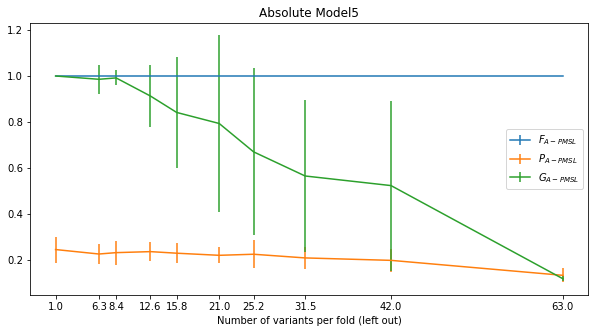

In [15]:
get_folds_abs('Model5')

[1.0, 1.4, 1.8, 2.7, 3.4, 4.5, 5.4, 6.8, 9.0, 13.5]
[0.7380952380952382, 0.7629665071770336, 0.7281446039340776, 0.7465311004784689, 0.7598128019323671, 0.7255679064459141, 0.7578640776699028, 0.7184540889526543, 0.7656765676567657, 0.7823411782802645]
[0.6289286209405094, 0.5958478834530794, 0.6141236198116702, 0.6257722458360655, 0.5954512601379729, 0.5773981573719389, 0.600139137269438, 0.5925212689500821, 0.5832119580580133, 0.5597368640360015]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


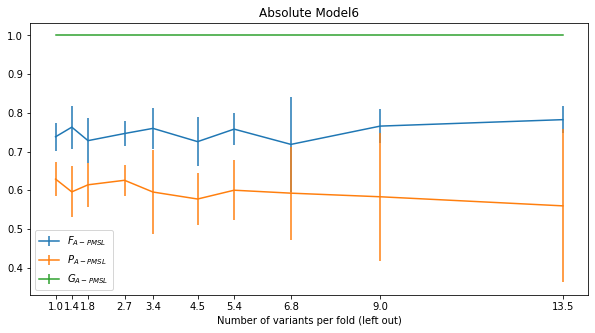

In [16]:
get_folds_abs('Model6')

[1.0, 6.0, 8.0, 12.0, 15.0, 20.0, 24.0, 30.0, 40.0, 60.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9925361111111112, 0.9923583333333335, 0.9921500000000001, 0.9919, 0.991375, 0.9899583333333334, 0.9929, 0.9901041666666666, 0.9909166666666667, 0.9864999999999999]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4179311220749419, 0.6766495198120309, 0.6854958657183405, 0.7570444225969095]


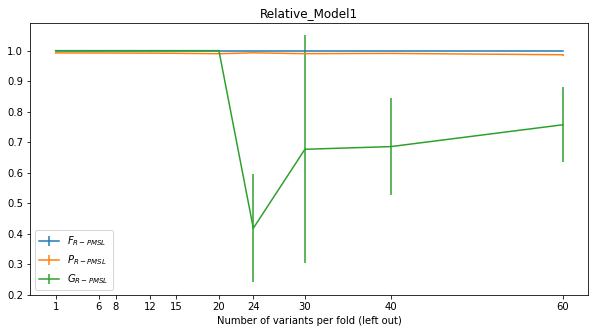

In [17]:
get_folds_rel('Model1')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9956884765624999, 0.99585546875, 0.9954270833333332, 0.9952890625, 0.995830078125, 0.9955208333333333, 0.994953125, 0.99412109375, 0.9937760416666667, 0.9948046875000001]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3916230229206465, 0.6626129230470683, 0.0]


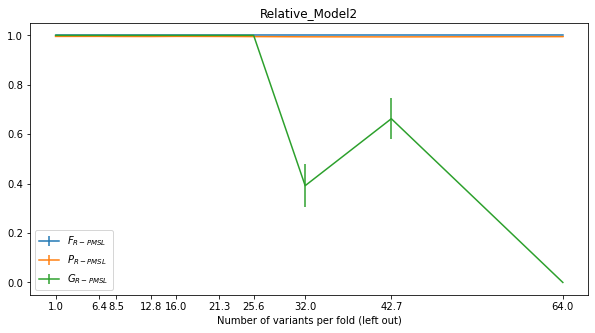

In [18]:
get_folds_rel('Model2')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9978314208984371, 0.9973124999999999, 0.9976770833333333, 0.9970625, 0.996748046875, 0.9966927083333333, 0.996703125, 0.99765625, 0.9970052083333334, 0.9982421875]
[1.0, 1.0, 1.0, 1.0, 0.9603779487335516, 0.9905719183419043, 0.9849249379604886, 0.6662188122039755, 0.5628528114331471, 0.0]


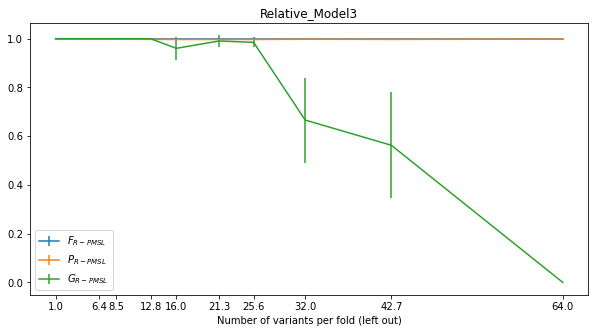

In [19]:
get_folds_rel('Model3')

[1.0, 3.2, 4.3, 6.4, 8.0, 10.7, 12.8, 16.0, 21.3, 32.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9654394531249998, 0.9632343749999999, 0.9664166666666667, 0.964671875, 0.9634960937500001, 0.9665104166666666, 0.961375, 0.9659375, 0.9580208333333333, 0.967890625]
[1.0, 1.0, 1.0, 1.0, 0.9077818065701979, 0.9914089347079038, 0.8155292322878808, 0.13887711451512316, 0.5487160726126827, 0.04109801488833747]


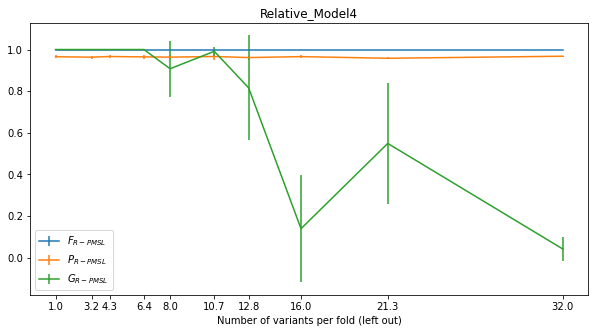

In [20]:
get_folds_rel('Model4')

[1.0, 6.3, 8.4, 12.6, 15.8, 21.0, 25.2, 31.5, 42.0, 63.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9608843537414965, 0.9568373015873017, 0.9584074074074075, 0.9613809523809522, 0.9585119047619048, 0.9580291005291004, 0.9566190476190476, 0.9580753968253969, 0.9565873015873017, 0.9550000000000001]
[1.0, 0.9963746223564953, 0.9874875868917578, 0.8928660752241024, 0.8575314881396707, 0.7936185428466512, 0.6616159407215915, 0.5477338637999358, 0.528784983206743, 0.09254043101981113]


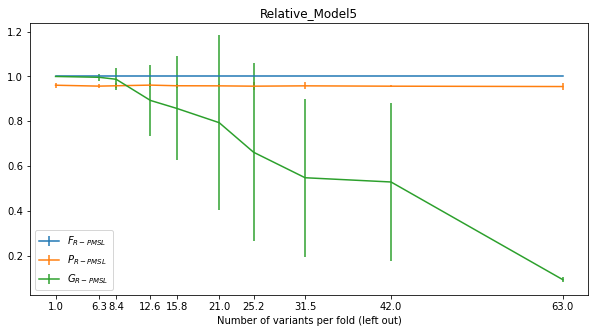

In [21]:
get_folds_rel('Model5')

[1.0, 1.4, 1.8, 2.7, 3.4, 4.5, 5.4, 6.8, 9.0, 13.5]
[0.9701992143813984, 0.9737419442724933, 0.9679401362512138, 0.970141148218149, 0.9723475244514742, 0.965953596444701, 0.9701816529533838, 0.964982803869756, 0.9710109963520962, 0.9663775654179397]
[0.9519890260631001, 0.9387407407407409, 0.9473580246913579, 0.950851851851852, 0.9347685185185185, 0.9374074074074074, 0.9386666666666666, 0.9348148148148148, 0.9195061728395061, 0.9125925925925926]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


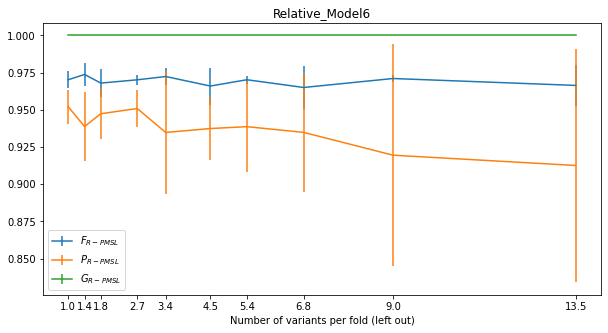

In [22]:
get_folds_rel('Model6')